In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import functions as main
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Transform cluttered data

### Merge de todos os dados Macro num só CSV

In [50]:
from pathlib import Path
import glob

path = r"D:\OneDrive - Instituto Politecnico de Castelo Branco\002_Learning\001_Pos_Graduacao\Ciclo 5 - Projeto Final\ProjetoFinal-PosGraduacaoEngenhariaFinanceira\variables_data"
files = Path(path).glob('*.csv')  # .rglob to get subdirectories

dfs = []
for file in files:
    # Leitura do CSV
    data = pd.read_csv(file)
    
    # Ajuste do nome da coluna de datas para um nome consistente
    if 'DATE' in data.columns:
        data.rename(columns={'DATE': 'Date'}, inplace=True)
    
    if 'date' in data.columns:
        data.rename(columns={'date': 'Date'}, inplace=True)

    data["Date"] = pd.to_datetime(data.Date)

    # Definir a coluna de datas como índice
    data.set_index('Date', inplace=True)
    
    # Adicionar o DataFrame à lista
    dfs.append(data)

# Juntar todos os DataFrames usando o método "outer"
df = pd.concat(dfs, axis=1, join='outer')

In [83]:
#df_daily = df.resample("D").last()
#df_daily_mod = df_daily.loc["2011-1-1":"2024-7-31"]

# Daily to Weekly

# mean variables because they're daily
sum_variables = ['Bitcoin_Wikipedia_Search', 'USD_OnChain_Volume', 'Miners_Revenue_USD' ]

mean_variables = ['Nr_Addresses', 'Nr_Transactions']

# last value because they're trendy
last_variables = ['BTC_Supply', 'OIL_USD', 'VIX', 'Ten_YR_USA', 'TLT', 'GLD', 'QQQ', 
                  'Dollar_Index', 'M2_Liquidity', 'BTC_USD', 
                  'BalanceSheet_global', 'BalanceSheet_FED', 'HashRate', 'Mining_Difficulty']

df_to_resample = df.copy()
df_to_resample = df_to_resample.loc["2010-12-03":"2024-6-28"]


# Create a new DataFrame to store the resampled data
df_resampled = pd.DataFrame()

for col in df_to_resample.columns:
    if col in sum_variables:
        df_resampled[col] = df_to_resample[col].resample('W-FRI').sum()
    elif col in mean_variables:
        df_resampled[col] = df_to_resample[col].resample('W-FRI').mean()
    elif col in last_variables:
        df_resampled[col] = df_to_resample[col].resample('W-FRI').last()

In [84]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 709 entries, 2010-12-03 to 2024-06-28
Freq: W-FRI
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   BalanceSheet_FED          708 non-null    float64
 1   BalanceSheet_global       708 non-null    float64
 2   Bitcoin_Wikipedia_Search  709 non-null    float64
 3   BTC_USD                   709 non-null    float64
 4   USD_OnChain_Volume        709 non-null    float64
 5   HashRate                  709 non-null    float64
 6   M2_Liquidity              708 non-null    float64
 7   Dollar_Index              709 non-null    float64
 8   QQQ                       709 non-null    float64
 9   GLD                       709 non-null    float64
 10  TLT                       709 non-null    float64
 11  Ten_YR_USA                709 non-null    float64
 12  VIX                       709 non-null    float64
 13  OIL_USD                   709 non-

In [85]:
df_resampled

,BalanceSheet_FED,BalanceSheet_global,Bitcoin_Wikipedia_Search,BTC_USD,USD_OnChain_Volume,HashRate,M2_Liquidity,Dollar_Index,QQQ,GLD,TLT,Ten_YR_USA,VIX,OIL_USD,Miners_Revenue_USD,Mining_Difficulty,Nr_Transactions,Nr_Addresses,BTC_Supply
Date,,,,,,,,,,,,,,,,,,,
2010-12-03,NaN,NaN,43.000,0.251,5766.700,0.077,NaN,79.380,47.540,138.070,66.124,3.017,18.010,89.190,2412.503,8078.195,384.000,481.000,4768350.000
2010-12-10,2382294.000,11871.421,352.000,0.204,57208.409,0.091,8829.100,80.070,48.087,135.410,64.912,3.296,17.610,87.790,19381.575,12252.000,467.429,593.000,4846150.000
2010-12-17,2385754.000,11775.325,3336.000,0.240,49160.909,0.105,8848.400,80.370,48.209,134.200,64.974,3.330,16.110,88.020,15629.744,12252.000,589.571,844.714,4905800.000
2010-12-24,2427921.000,11815.129,3031.000,0.248,77357.125,0.108,8857.200,80.500,48.403,134.660,64.758,3.393,16.470,91.510,16381.178,14484.162,617.286,830.857,4963300.000
2010-12-31,2420570.000,11806.294,2028.000,0.300,48265.519,0.118,8874.800,79.030,48.156,138.720,65.812,3.305,17.750,91.380,16158.666,14484.162,580.857,793.143,5020500.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31,7284319.000,23330.182,19635.000,67482.250,58354787361.611,620804532.155,20792.200,104.670,449.995,215.300,89.558,4.514,12.920,76.990,229989144.217,84381461788831.266,681915.857,460763.429,19706193.750
2024-06-07,7255687.000,23384.058,18226.000,69330.510,48588709458.090,590944002.961,20949.100,104.890,462.225,211.600,90.907,4.430,12.220,75.530,252796181.495,83716654861184.766,615134.143,460443.000,19709225.000
2024-06-14,7258974.000,23379.842,16773.000,66006.130,40932364485.887,532681918.162,20979.100,105.550,478.430,215.730,94.056,4.213,12.660,78.450,249923395.093,83716654861184.844,632254.857,495188.000,19712368.750


In [86]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 709 entries, 2010-12-03 to 2024-06-28
Freq: W-FRI
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   BalanceSheet_FED          708 non-null    float64
 1   BalanceSheet_global       708 non-null    float64
 2   Bitcoin_Wikipedia_Search  709 non-null    float64
 3   BTC_USD                   709 non-null    float64
 4   USD_OnChain_Volume        709 non-null    float64
 5   HashRate                  709 non-null    float64
 6   M2_Liquidity              708 non-null    float64
 7   Dollar_Index              709 non-null    float64
 8   QQQ                       709 non-null    float64
 9   GLD                       709 non-null    float64
 10  TLT                       709 non-null    float64
 11  Ten_YR_USA                709 non-null    float64
 12  VIX                       709 non-null    float64
 13  OIL_USD                   709 non-

In [39]:
'''
df_weekly_mod.interpolate(method='linear', inplace=True)
df_weekly_mod = df_weekly_mod.loc[df_weekly_mod.index[1]:]
'''

In [95]:
df_weekly_full = df_resampled.copy()
df_weekly_full = df_weekly_full.reindex(sorted(df_weekly_full.columns), axis=1)
df_weekly_full = df_weekly_full.dropna()
df_weekly_full.shape

(708, 19)

In [96]:
df_weekly_full.isna().sum()

BTC_Supply                  0
BTC_USD                     0
BalanceSheet_FED            0
BalanceSheet_global         0
Bitcoin_Wikipedia_Search    0
Dollar_Index                0
GLD                         0
HashRate                    0
M2_Liquidity                0
Miners_Revenue_USD          0
Mining_Difficulty           0
Nr_Addresses                0
Nr_Transactions             0
OIL_USD                     0
QQQ                         0
TLT                         0
Ten_YR_USA                  0
USD_OnChain_Volume          0
VIX                         0
dtype: int64

In [97]:
df_weekly_full.to_csv(f"df_weekly.csv", date_format='%Y-%m-%d')

# Descriptive analysis

In [2]:
opencsv = pd.read_csv(r"D:\OneDrive - Instituto Politecnico de Castelo Branco\002_Learning\001_Pos_Graduacao\Ciclo 5 - Projeto Final\ProjetoFinal-PosGraduacaoEngenhariaFinanceira\df_weekly.csv", sep=",")
opencsv.set_index('Date', inplace=True)
opencsv.index = pd.to_datetime(opencsv.index)
opencsv = opencsv.asfreq(pd.infer_freq(opencsv.index))
opencsv = opencsv.astype(float)

In [3]:
opencsv

,BTC_Supply,BTC_USD,BalanceSheet_FED,BalanceSheet_global,Bitcoin_Wikipedia_Search,Dollar_Index,GLD,HashRate,M2_Liquidity,Miners_Revenue_USD,Mining_Difficulty,Nr_Addresses,Nr_Transactions,OIL_USD,QQQ,TLT,Ten_YR_USA,USD_OnChain_Volume,VIX
Date,,,,,,,,,,,,,,,,,,,
2010-12-10,4.846150e+06,0.204,2382294.0,11871.4208,352.0,80.070000,135.410004,9.135753e-02,8829.1,1.938157e+04,1.225200e+04,593.000000,467.428571,87.790001,48.086807,64.911652,3.296,5.720841e+04,17.610001
2010-12-17,4.905800e+06,0.240,2385754.0,11775.3249,3336.0,80.370003,134.199997,1.053657e-01,8848.4,1.562974e+04,1.225200e+04,844.714286,589.571429,88.019997,48.208679,64.974373,3.330,4.916091e+04,16.110001
2010-12-24,4.963300e+06,0.248,2427921.0,11815.1288,3031.0,80.500000,134.660004,1.080017e-01,8857.2,1.638118e+04,1.448416e+04,830.857143,617.285714,91.510002,48.403194,64.758339,3.393,7.735713e+04,16.469999
2010-12-31,5.020500e+06,0.300,2420570.0,11806.2939,2028.0,79.029999,138.720001,1.180819e-01,8874.8,1.615867e+04,1.448416e+04,793.142857,580.857143,91.379997,48.155598,65.812241,3.305,4.826552e+04,17.750000
2011-01-07,5.076100e+06,0.320,2436064.0,11809.9985,1857.0,81.010002,133.580002,1.167331e-01,8888.5,1.704035e+04,1.630742e+04,938.000000,908.428571,88.029999,49.402397,64.574562,3.328,3.779481e+04,17.139999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31,1.970619e+07,67482.250,7284319.0,23330.1818,19635.0,104.669998,215.300003,6.208045e+08,20792.2,2.299891e+08,8.438146e+13,460763.428571,681915.857143,76.989998,449.994751,89.557648,4.514,5.835479e+10,12.920000
2024-06-07,1.970922e+07,69330.510,7255687.0,23384.0579,18226.0,104.889999,211.600006,5.909440e+08,20949.1,2.527962e+08,8.371665e+13,460443.000000,615134.142857,75.529999,462.225311,90.906853,4.430,4.858871e+10,12.220000
2024-06-14,1.971237e+07,66006.130,7258974.0,23379.8425,16773.0,105.550003,215.729996,5.326819e+08,20979.1,2.499234e+08,8.371665e+13,495188.000000,632254.857143,78.449997,478.429565,94.056297,4.213,4.093236e+10,12.660000


In [4]:
opencsv.shape

(708, 19)

In [5]:
pd.set_option('float_format', '{:.3f}'.format)
descriptive_analysis = opencsv.describe().T
descriptive_analysis

,count,mean,std,min,25%,50%,75%,max
BTC_Supply,708.000,15290741.265,3986372.925,4846150.000,12714143.750,16575062.500,18622234.375,19718384.375
BTC_USD,708.000,12208.555,17589.252,0.204,244.107,3624.440,18666.945,69903.720
BalanceSheet_FED,708.000,5191922.089,2036845.275,2382294.000,3921263.000,4461114.000,7334178.250,8965487.000
BalanceSheet_global,708.000,17273.634,3653.219,11775.325,14438.165,16528.975,20598.823,23509.581
Bitcoin_Wikipedia_Search,708.000,56645.277,98921.053,352.000,22719.250,34969.000,54169.750,2027765.000
Dollar_Index,708.000,92.527,9.125,72.930,82.573,94.805,98.518,113.310
GLD,708.000,145.223,26.935,101.250,121.258,140.305,167.625,223.660
HashRate,708.000,93404172.361,148463266.849,0.091,63740.552,7668346.911,133876477.830,676117474.022
M2_Liquidity,708.000,14758.669,4220.780,8789.400,11278.675,13707.900,19407.075,22048.800
Miners_Revenue_USD,708.000,94707210.928,113905946.334,15629.744,7496492.928,45997234.817,142700775.286,489710970.485


In [6]:
descriptive_analysis.to_csv("descriptive_analysis.csv")

In [103]:
print(opencsv.columns)

Index(['BTC_Supply', 'BTC_USD', 'BalanceSheet_FED', 'BalanceSheet_global',
       'Bitcoin_Wikipedia_Search', 'Dollar_Index', 'GLD', 'HashRate',
       'M2_Liquidity', 'Miners_Revenue_USD', 'Mining_Difficulty',
       'Nr_Addresses', 'Nr_Transactions', 'OIL_USD', 'QQQ', 'TLT',
       'Ten_YR_USA', 'USD_OnChain_Volume', 'VIX'],
      dtype='object')


In [ ]:
#quotes_pct_ret_corr = opencsv.pct_change().dropna().corr()

In [9]:
#quotes_pct_ret_corr.to_csv("correlation_matrix.csv")

# OLS data Prep

In [104]:
opencsv = pd.read_csv(r"D:\OneDrive - Instituto Politecnico de Castelo Branco\002_Learning\001_Pos_Graduacao\Ciclo 5 - Projeto Final\ProjetoFinal-PosGraduacaoEngenhariaFinanceira\df_weekly.csv", sep=",")
opencsv.set_index('Date', inplace=True)
opencsv.index = pd.to_datetime(opencsv.index)
opencsv = opencsv.asfreq(pd.infer_freq(opencsv.index))
opencsv = opencsv.astype(float)

In [105]:
opencsv.columns

Index(['BTC_Supply', 'BTC_USD', 'BalanceSheet_FED', 'BalanceSheet_global',
       'Bitcoin_Wikipedia_Search', 'Dollar_Index', 'GLD', 'HashRate',
       'M2_Liquidity', 'Miners_Revenue_USD', 'Mining_Difficulty',
       'Nr_Addresses', 'Nr_Transactions', 'OIL_USD', 'QQQ', 'TLT',
       'Ten_YR_USA', 'USD_OnChain_Volume', 'VIX'],
      dtype='object')

In [107]:
opencsv.shape

(708, 19)

In [109]:
opencsv.isna().sum()

BTC_Supply                  0
BTC_USD                     0
BalanceSheet_FED            0
BalanceSheet_global         0
Bitcoin_Wikipedia_Search    0
Dollar_Index                0
GLD                         0
HashRate                    0
M2_Liquidity                0
Miners_Revenue_USD          0
Mining_Difficulty           0
Nr_Addresses                0
Nr_Transactions             0
OIL_USD                     0
QQQ                         0
TLT                         0
Ten_YR_USA                  0
USD_OnChain_Volume          0
VIX                         0
dtype: int64

In [110]:
opencsv.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 708 entries, 2010-12-10 to 2024-06-28
Freq: W-FRI
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   BTC_Supply                708 non-null    float64
 1   BTC_USD                   708 non-null    float64
 2   BalanceSheet_FED          708 non-null    float64
 3   BalanceSheet_global       708 non-null    float64
 4   Bitcoin_Wikipedia_Search  708 non-null    float64
 5   Dollar_Index              708 non-null    float64
 6   GLD                       708 non-null    float64
 7   HashRate                  708 non-null    float64
 8   M2_Liquidity              708 non-null    float64
 9   Miners_Revenue_USD        708 non-null    float64
 10  Mining_Difficulty         708 non-null    float64
 11  Nr_Addresses              708 non-null    float64
 12  Nr_Transactions           708 non-null    float64
 13  OIL_USD                   708 non-

### Normality Tests

Text(0.5, 1.0, 'Distribution of Bitcoin returns in $log$ scale')

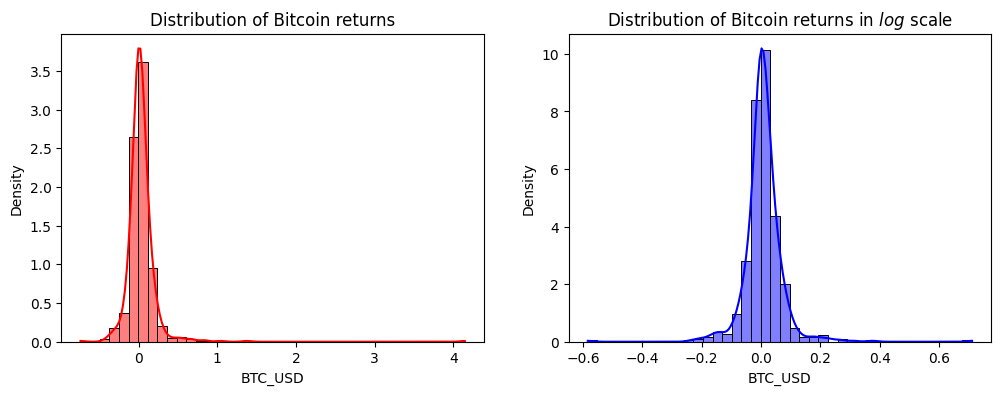

In [111]:
import seaborn as sns

btc_returns = opencsv["BTC_USD"].pct_change().dropna()
btc_log_returns = np.log10(opencsv["BTC_USD"]).diff().dropna()

f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.histplot(btc_returns,bins=40,color='r',ax=ax, kde=True, stat='density')
ax.set_title('Distribution of Bitcoin returns')

ax=f.add_subplot(122)
sns.histplot(btc_log_returns,bins=40,color='b',ax=ax, kde=True, stat='density')
ax.set_title('Distribution of Bitcoin returns in $log$ scale')

#### Box -Cox transformation

A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests. All that we need to perform this transformation is to find lambda value and apply the rule shown below to your variable.  
$$\mathbf{ \begin {cases}\frac {y^\lambda - 1}{\lambda},& y_i\neg=0 \\
 log(y_i) & \lambda = 0 \end{cases}}$$
 The trick of Box-Cox transformation is to find lambda value, however in practice this is quite affordable. The following function returns the transformed variable, lambda value,confidence interval

In [ ]:
from scipy.stats import boxcox
BTC_USD_BoxCox,lam, ci= boxcox(opencsv["BTC_USD"],alpha=0.05)

ci,lam

In [ ]:
import seaborn as sns

# Convert numpy array to a DataFrame
BTC_USD_BoxCox_df = pd.DataFrame(BTC_USD_BoxCox, index=opencsv.index, columns=["BTC_USD_BoxCox"])

btc_BoxCox_returns = BTC_USD_BoxCox_df["BTC_USD_BoxCox"].pct_change().dropna()

f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.histplot(btc_returns,bins=40,color='r',ax=ax, kde=True, stat='density')
ax.set_title('Distribution of Bitcoin returns')

ax=f.add_subplot(122)
sns.histplot(btc_BoxCox_returns,bins=40,color='b',ax=ax, kde=True, stat='density')
ax.set_title('Distribution of Bitcoin Box Cox returns')

### Winsorozation

In [112]:
from scipy.stats.mstats import winsorize

winsorized_df = opencsv.copy()

winsorized_df = winsorized_df.apply(lambda col: winsorize(col, (0.01, 0.01)))
winsorized_df.head()

,BTC_Supply,BTC_USD,BalanceSheet_FED,BalanceSheet_global,Bitcoin_Wikipedia_Search,Dollar_Index,GLD,HashRate,M2_Liquidity,Miners_Revenue_USD,Mining_Difficulty,Nr_Addresses,Nr_Transactions,OIL_USD,QQQ,TLT,Ten_YR_USA,USD_OnChain_Volume,VIX
Date,,,,,,,,,,,,,,,,,,,
2010-12-10,5254200.000,0.446,2468131.000,11871.421,3031.000,80.070,135.410,0.178,8886.000,25869.844,22012.381,1389.714,1283.429,87.790,48.087,64.912,3.296,91443.786,17.610
2010-12-17,5254200.000,0.446,2468131.000,11857.228,3336.000,80.370,134.200,0.178,8886.000,25869.844,22012.381,1389.714,1283.429,88.020,48.209,64.974,3.330,91443.786,16.110
2010-12-24,5254200.000,0.446,2468131.000,11857.228,3031.000,80.500,134.660,0.178,8886.000,25869.844,22012.381,1389.714,1283.429,91.510,48.403,64.758,3.393,91443.786,16.470
2010-12-31,5254200.000,0.446,2468131.000,11857.228,3031.000,79.030,138.720,0.178,8886.000,25869.844,22012.381,1389.714,1283.429,91.380,48.156,65.812,3.305,91443.786,17.750
2011-01-07,5254200.000,0.446,2468131.000,11857.228,3031.000,81.010,133.580,0.178,8888.500,25869.844,22012.381,1389.714,1283.429,88.030,49.402,64.575,3.328,91443.786,17.140


In [113]:
winsorized_df.shape

(708, 19)

### Log Df

In [114]:
# transformacao logaritcmica de todas as colunas

log_df = np.log10(winsorized_df) 

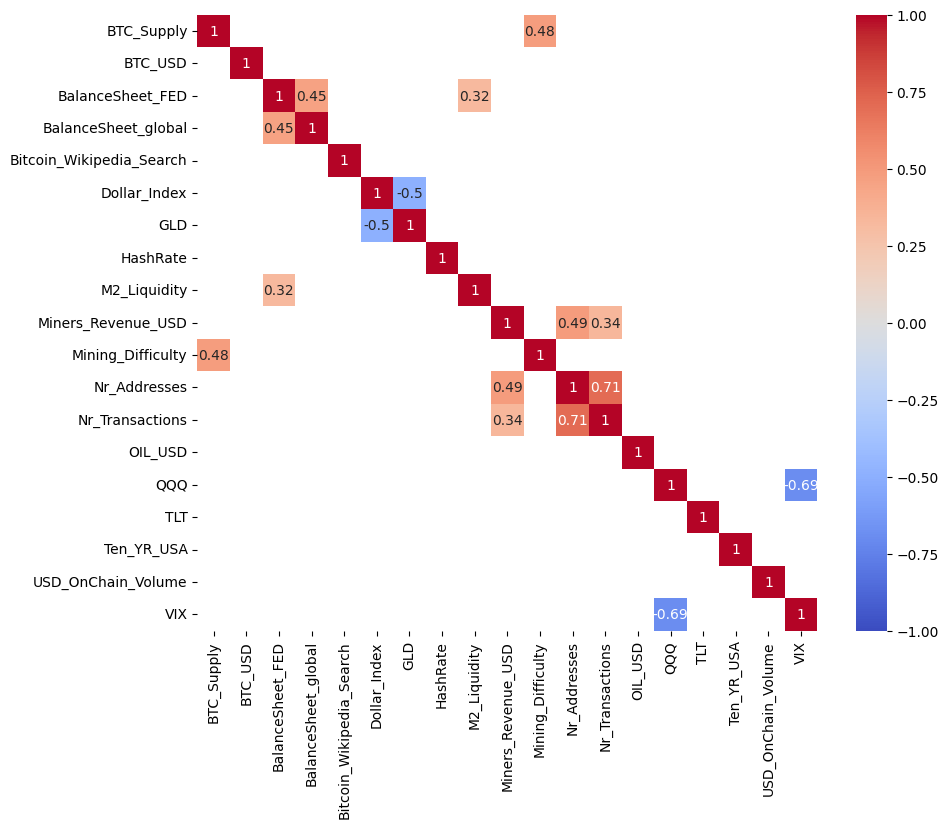

In [115]:
main.correlation_map(df=log_df, threshold=0.3)

In [116]:
log_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 708 entries, 2010-12-10 to 2024-06-28
Freq: W-FRI
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   BTC_Supply                708 non-null    float64
 1   BTC_USD                   708 non-null    float64
 2   BalanceSheet_FED          708 non-null    float64
 3   BalanceSheet_global       708 non-null    float64
 4   Bitcoin_Wikipedia_Search  708 non-null    float64
 5   Dollar_Index              708 non-null    float64
 6   GLD                       708 non-null    float64
 7   HashRate                  708 non-null    float64
 8   M2_Liquidity              708 non-null    float64
 9   Miners_Revenue_USD        708 non-null    float64
 10  Mining_Difficulty         708 non-null    float64
 11  Nr_Addresses              708 non-null    float64
 12  Nr_Transactions           708 non-null    float64
 13  OIL_USD                   708 non-

In [117]:
log_df.isna().sum()

BTC_Supply                  0
BTC_USD                     0
BalanceSheet_FED            0
BalanceSheet_global         0
Bitcoin_Wikipedia_Search    0
Dollar_Index                0
GLD                         0
HashRate                    0
M2_Liquidity                0
Miners_Revenue_USD          0
Mining_Difficulty           0
Nr_Addresses                0
Nr_Transactions             0
OIL_USD                     0
QQQ                         0
TLT                         0
Ten_YR_USA                  0
USD_OnChain_Volume          0
VIX                         0
dtype: int64

In [123]:
log_df.to_csv(f"df_log_weekly.csv", date_format='%Y-%m-%d')

### Lagged variables

In [118]:
# Add 1 and 2 Lagged Variable

def lag_your_df(df, dependent_variable):
    lagged_df = pd.DataFrame()
    lagged_df.index = df.index

    for column in df.columns:
        if column != dependent_variable:    
            lagged_df[f'L1_{column}'] = df[column].shift(1)
    
    lagged_df[dependent_variable] = df[dependent_variable]

    return lagged_df.iloc[1:]

In [119]:
lagged_df = lag_your_df(log_df, "BTC_USD")
lagged_df

,L1_BTC_Supply,L1_BalanceSheet_FED,L1_BalanceSheet_global,L1_Bitcoin_Wikipedia_Search,L1_Dollar_Index,L1_GLD,L1_HashRate,L1_M2_Liquidity,L1_Miners_Revenue_USD,L1_Mining_Difficulty,L1_Nr_Addresses,L1_Nr_Transactions,L1_OIL_USD,L1_QQQ,L1_TLT,L1_Ten_YR_USA,L1_USD_OnChain_Volume,L1_VIX,BTC_USD
Date,,,,,,,,,,,,,,,,,,,
2010-12-17,6.721,6.392,4.075,3.482,1.903,2.132,-0.749,3.949,4.413,4.343,3.143,3.108,1.943,1.682,1.812,0.518,4.961,1.246,-0.351
2010-12-24,6.721,6.392,4.074,3.523,1.905,2.128,-0.749,3.949,4.413,4.343,3.143,3.108,1.945,1.683,1.813,0.522,4.961,1.207,-0.351
2010-12-31,6.721,6.392,4.074,3.482,1.906,2.129,-0.749,3.949,4.413,4.343,3.143,3.108,1.961,1.685,1.811,0.531,4.961,1.217,-0.351
2011-01-07,6.721,6.392,4.074,3.482,1.898,2.142,-0.749,3.949,4.413,4.343,3.143,3.108,1.961,1.683,1.818,0.519,4.961,1.249,-0.351
2011-01-14,6.721,6.392,4.074,3.482,1.909,2.126,-0.749,3.949,4.413,4.343,3.143,3.108,1.945,1.694,1.810,0.522,4.961,1.234,-0.351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31,7.294,6.863,4.368,4.316,2.020,2.333,8.786,4.319,8.387,13.924,5.678,5.769,1.891,2.649,1.957,0.650,10.689,1.077,4.827
2024-06-07,7.294,6.862,4.368,4.293,2.020,2.333,8.786,4.318,8.362,13.924,5.663,5.769,1.886,2.649,1.952,0.655,10.766,1.111,4.827
2024-06-14,7.294,6.861,4.368,4.261,2.021,2.326,8.772,4.321,8.403,13.923,5.663,5.769,1.878,2.649,1.959,0.646,10.687,1.087,4.820


In [122]:
lagged_df.to_csv(f"df_lagged_weekly.csv", date_format='%Y-%m-%d')

### Linear trend check

In [120]:
import plotly.express as px

def check_linearity(df, dependent_variable):
    for column in df.columns:
        if column != dependent_variable:
            df_pct_ret = df.pct_change().ffill()

            # Fazer scatter plot
            fig = px.scatter(df_pct_ret, x=df[column], y=df[dependent_variable], width=600, height=400, 
                             trendline="ols", trendline_color_override="black", title='OLS trend line')

            fig.update_layout(xaxis=dict(title=column), yaxis = dict(title=dependent_variable), template='seaborn').show()

In [121]:
dependent_variable = "BTC_USD"

check_linearity(lagged_df, dependent_variable)

# Split cycle Dfs

In [125]:
## ciclos
halving12 = "2012-11-28"
halving16 = "2016-07-09"
halving20 = "2020-05-11"
halving24 = "2024-04-19"


prep_df = lagged_df.copy()

ciclo1 = prep_df.loc[:halving12]
ciclo2 = prep_df.loc[halving12:halving16]
ciclo3 = prep_df.loc[halving16:halving20]
ciclo4 = prep_df.loc[halving20:halving24]
ciclo5 = prep_df.loc[halving24:]

In [126]:
# save all cycles df
for i in range(1, 6):  # Loop from 1 to 5 to match your DataFrame names
    df = globals()[f'ciclo{i}']  # Access each DataFrame using its name
    df.to_csv(f"df_ciclo{i}_weekly.csv", date_format='%Y-%m-%d')  # Save each DataFrame with a dynamic filename